In [1]:
#Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
%matplotlib inline


Jet lag is a common problem for people traveling across multiple time zones, but people can gradually adjust
to the new time zone since the exposure of the shifted light schedule to their eyes can resets the internal
circadian rhythm in a process called “phase shift”. Campbell and Murphy (1998) in a highly controversial
study reported that the human circadian clock can also be reset by only exposing the back of the knee
to light, with some hailing this as a major discovery and others challenging aspects of the experimental
design. The table below is taken from a later experiment by Wright and Czeisler (2002) that re-examined
the phenomenon. The new experiment measured circadian rhythm through the daily cycle of melatonin
production in 22 subjects randomly assigned to one of three light treatments. Subjects were woken from
sleep and for three hours were exposed to bright lights applied to the eyes only, to the knees only or to
neither (control group). The effects of treatment to the circadian rhythm were measured two days later by
the magnitude of phase shift (measured in hours) in each subject’s daily cycle of melatonin production. A
negative measurement indicates a delay in melatonin production, a predicted effect of light treatment, while
a positive number indicates an advance.

In [2]:
data_dict = {'Treatment':['Control']*8 + ['Knees']*7 + ['Eyes']*7,
             'Phase_Shift_hr':[0.53, 0.36, 0.2, -0.37, -0.6, -0.64, -0.68, -1.27, 
                                 0.73, 0.31, 0.03, -0.29, -0.56, -0.96, -1.61, 
                                 -0.78, -0.86, -1.35, -1.48, -1.52, -2.04, -2.83]}
df = pd.DataFrame(data_dict)
df.head()

,Treatment,Phase_Shift_hr
0,Control,0.53
1,Control,0.36
2,Control,0.20
3,Control,-0.37
4,Control,-0.60


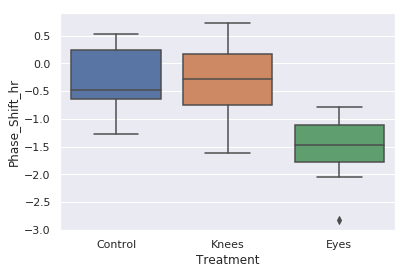

In [3]:
#Plotting a boxplot that will give us a feeling of the variation between the groups
sns.boxplot(x='Treatment', y='Phase_Shift_hr', data=df);

From the boxplot we can see that there seems to be a difference between the Knees and Eyes groups.
There may be an outlier in the Eyes group, but because we don't have much data in each group, we will leave it.

In [4]:
#Anova Regression model
model = ols('Phase_Shift_hr ~ C(Treatment)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Phase_Shift_hr   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     7.289
Date:                Tue, 07 Jan 2020   Prob (F-statistic):            0.00447
Time:                        12:12:57   Log-Likelihood:                -21.881
No. Observations:                  22   AIC:                             49.76
Df Residuals:                      19   BIC:                             53.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.30

In [5]:
aov_table = sm.stats.anova_lm(model, typ=1)
print(aov_table)

                df    sum_sq   mean_sq         F    PR(>F)
C(Treatment)   2.0  7.224492  3.612246  7.289449  0.004472
Residual      19.0  9.415345  0.495544       NaN       NaN


Df Treatments = k − 1 = 2

Df Error = N − k = 22 − 3 = 19

Df Total = Df Treatments + Df Erorr = (N − k) + (k − 1) = N − 1 = 21

SSTR = MSTR × (k − 1) = 3.6122 × 2 = 7.224

SST = SSE + SSTR = 7.224 + 9.415 = 16.639

MSE = SSE/(N − k) = 9.415/19 = 0.4955

F-test = MSTR /MSE = 3.6122/0.4955 = 7.29

the two hypotheses:

H 0 :μ 1 =μ 2 =μ 3

H A : at least 2 of the means are not equal (μ1 != μ2 and/or μ1 != μ3 and/or μ3 != μ2 )


The P value is 0.004, as given in the ANOVA table.

Because the p-value is small we reject the null hypothesis that all three means are equal. Therefore, the mean
of the phase shift is not the same for all three treatment groups, and we conclude that light treatment does
affect phase shift. We can conclude this because if any one of the three treatments is different, then at least
one of the treatments must be different from the control group.

In [6]:
#Further Analysis - Pairwise Comparison tests at alpha=0.05
PC = MultiComparison(df['Phase_Shift_hr'], df['Treatment'])
PC_results = PC.tukeyhsd()
print(PC_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1 group2 meandiff  lower   upper  reject
----------------------------------------------
Control  Eyes  -1.2427   -2.168 -0.3173  True 
Control Knees   -0.027  -0.9523  0.8984 False 
  Eyes  Knees   1.2157    0.26   2.1714  True 
----------------------------------------------


1) Eyes group's Phase Shift(hr) is statistically significantly shorter than Control group. 

2) Knees group's Phase Shift(hr) is statistically significantly longer than Eyes group. 

3) Subjects in the Knees and Control groups may plausibly have similar Phase Shift(hr)